In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
import json
import pickle
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopWords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print(stopWords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [3]:
path ='./datasets/medical-relatedID.json'
with open(path,'rb') as file:
    data = json.load(file)

In [4]:
patterns = []
tags = []
responses = {}

for intent in data['intents']:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        tags.append(intent['tag'])
    responses[intent['tag']] = intent['responses']

print(len(patterns))
print(len(responses))
print(len(tags))
print(patterns[0:9])
print(tags[0:9])

pickle.dump(tags,open('./model/tags.pkl','wb'))
pickle.dump(responses,open('./model/responses.pkl','wb'))

246
55
246
['Apa yang harus dilakukan jika terpotong?', 'Bagaimana cara menyembuhkan luka?', 'Obat apa yang harus dipakai untuk luka?', 'apa yang harus diaplikasikan pada luka?', 'Potongan', 'Bagaimana cara mengobati lecet?', 'Apakah abrasi menimbulkan bekas luka?', 'Lecet', 'apa yang harus dilakukan jika terjadi lecet?']
['Potongan', 'Potongan', 'Potongan', 'Potongan', 'Potongan', 'Lecet', 'Lecet', 'Lecet', 'Lecet']


In [5]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [6]:
newPatern = []

for patern in patterns:
    newPatern.append(stemmer.stem(patern))

print(newPatern)

pickle.dump(newPatern,open('./model/patterns.pkl','wb'))

['apa yang harus laku jika potong', 'bagaimana cara sembuh luka', 'obat apa yang harus pakai untuk luka', 'apa yang harus aplikasi pada luka', 'potong', 'bagaimana cara obat lecet', 'apakah abrasi timbul bekas luka', 'lecet', 'apa yang harus laku jika jadi lecet', 'obat apa yang harus guna untuk luka lecet', 'bagaimana cara sembuh lecet', 'bagaimana anda obat sting', 'sengat', 'apa yang harus laku jika anda sengat', 'obat apa yang guna jika sengat', 'cara hilang serpih', 'bagaimana cara sembuh serpih', 'apa yang harus saya laku bila saya kena serpih', 'bagaimana cara anda bawa serpih ke muka', 'bagaimana cara obat kilir', 'apa yang harus saya laku jika saya kilir', 'krim apa yang harus guna jika saya kilir', 'obat apa yang harus guna jika saya kilir', 'bagaimana cara obat tegang', 'apa yang harus saya laku jika saya serang strain', 'krim apa yang harus guna jika saya serang tegang otot', 'obat apa yang harus saya guna jika saya serang strain', 'bagaimana anda diagnosis suatu strain', '

In [7]:
def splitDataset(inputs, labels):
    totalData = len(inputs)
    valSize = int(totalData * 0.2)
    valSplit = list(range(0, valSize * 5, 5))
    trainSplit = [i for i in range(totalData) if i not in valSplit]


    trainTexts = [inputs[i] for i in trainSplit]
    valTexts = [inputs[i] for i in valSplit]
    trainLabels = [labels[i] for i in trainSplit]
    valLabels = [labels[i] for i in valSplit]

    trainDataset = tf.data.Dataset.from_tensor_slices((trainTexts, trainLabels))
    valDataset = tf.data.Dataset.from_tensor_slices((valTexts, valLabels))

    return trainDataset, valDataset
    
trainDataset, valDataset = splitDataset(newPatern, tags)

In [8]:
print(f"There are {trainDataset.cardinality()} sentence-label pairs for training.\n")
print(f"There are {valDataset.cardinality()} sentence-label pairs for validation.\n")

print(trainDataset)
print(valDataset)

There are 197 sentence-label pairs for training.

There are 49 sentence-label pairs for validation.

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [9]:
for data in trainDataset.take(10).as_numpy_iterator():
    print(data)

for data in valDataset.take(10).as_numpy_iterator():
    print(data)

(b'bagaimana cara sembuh luka', b'Potongan')
(b'obat apa yang harus pakai untuk luka', b'Potongan')
(b'apa yang harus aplikasi pada luka', b'Potongan')
(b'potong', b'Potongan')
(b'apakah abrasi timbul bekas luka', b'Lecet')
(b'lecet', b'Lecet')
(b'apa yang harus laku jika jadi lecet', b'Lecet')
(b'obat apa yang harus guna untuk luka lecet', b'Lecet')
(b'bagaimana anda obat sting', b'sengatan')
(b'sengat', b'sengatan')
(b'apa yang harus laku jika potong', b'Potongan')
(b'bagaimana cara obat lecet', b'Lecet')
(b'bagaimana cara sembuh lecet', b'Lecet')
(b'cara hilang serpih', b'Terpecah')
(b'apa yang harus saya laku jika saya kilir', b'Terkilir')
(b'krim apa yang harus guna jika saya serang tegang otot', b'Ketegangan')
(b'apa yang harus saya laku jika saya demam ringan', b'Demam')
(b'obat apa yang harus minum jika saya hidung sumbat', b'Hidung tersumbat')
(b'bagaimana cara obat batuk', b'Batuk')
(b'apa yang harus saya laku jika saya sakit tenggorok', b'Sakit tenggorokan')


In [10]:
def standardizeFunc(sentence):
    stopwords = stopWords
    sentence = tf.strings.lower(sentence)

    for word in stopwords:
        if word[0] == "'":
            sentence = tf.strings.regex_replace(sentence, rf"{word}\b", "")
        else:
            sentence = tf.strings.regex_replace(sentence, rf"\b{word}\b", "")
    sentence = tf.strings.regex_replace(sentence, r'[!"#$%&()\*\+,-\./:;<=>?@\[\\\]^_`{|}~\']', "")

    return sentence

In [11]:
maxLeght = 30
def fitVectorizer(trainSentences, standardizeFunc):
    vectorizer = tf.keras.layers.TextVectorization(
		standardize=standardizeFunc,
    output_sequence_length=maxLeght
	)
    vectorizer.adapt(trainSentences)
    return vectorizer

In [12]:
textDataset = trainDataset.map(lambda text, label: text)
vectorizer = fitVectorizer(textDataset, standardizeFunc)
vocabSize = vectorizer.vocabulary_size()

print(f"Vocabulary contains {vocabSize} words\n")

Vocabulary contains 108 words



In [13]:
def fitLabelEncoder(trainLabel, valLabel):
    labels = trainLabel.concatenate(valLabel) 

    labelEncoder = tf.keras.layers.StringLookup(num_oov_indices=0)
    labelEncoder.adapt(labels)

    return labelEncoder

In [14]:
trainLabels = trainDataset.map(lambda text, label: label)
valLabels = valDataset.map(lambda text, label: label)

labelEncoder = fitLabelEncoder(trainLabels,valLabels)
uniqLabel = len(labelEncoder.get_vocabulary())

print(f'Unique labels: {labelEncoder.get_vocabulary()}')
print(f'Number of unique labels: {uniqLabel}')

Unique labels: ['gigitan binatang', 'Sakit Mata', 'Luka bakar', 'Lecet', 'Ketegangan', 'Hidung tersumbat', 'Gatal', 'gigitan ular', 'Terbakar sinar matahari', 'Reaksi Alergi', 'Radang dingin', 'Potongan', 'Mimisan', 'Melepuh', 'Mata Gatal', 'Keracunan Makanan', 'Hipotermia', 'Batuk', 'sengatan', 'mimisan', 'kejang', 'Tersedak', 'Terpecah', 'Terkilir', 'Tenggelam', 'Serangan Panas', 'Sakit tenggorokan', 'Sakit kepala', 'Sakit Perut', 'Ruam', 'Resusitasi Jantung Paru (RJP)', 'Racun', 'Pusing', 'Pingsan', 'Perdarahan Normal', 'Pendarahan rektal', 'Patah', 'Otot Tertarik', 'Nyeri Testis', 'Memar', 'Masalah kulit', 'Masalah gastrointestinal', 'Luka Bakar Kimia', 'Luka', 'Kulit terbakar akibat sinar matahari', 'Kelelahan Akibat Panas', 'Jari Kaki Patah', 'Gigitan embun beku', 'Gigitan Serangga', 'Gigi', 'Dingin', 'Diare', 'Demam', 'Cedera Mata', 'Cedera Kepala']
Number of unique labels: 55


In [15]:
def preprocessDataset(dataset, textVectorizer, labelEncoder):
    dataset = dataset.map(lambda text, label: (textVectorizer(text), labelEncoder(label)))
    dataset = dataset.batch(8)

    return dataset

In [16]:
trainProcDataset = preprocessDataset(trainDataset, vectorizer, labelEncoder)
valProcDataset = preprocessDataset(valDataset, vectorizer, labelEncoder)

print(f"batch train dataset: {trainProcDataset.cardinality()}")
print(f"batch validation dataset: {valProcDataset.cardinality()}")

trainBatch = next(trainProcDataset.as_numpy_iterator())
valBatch = next(valProcDataset.as_numpy_iterator())

print(f"Shape train batch: {trainBatch[0].shape}")
print(f"Shape validation batch: {valBatch[0].shape}")

batch train dataset: 25
batch validation dataset: 7
Shape train batch: (8, 30)
Shape validation batch: (8, 30)


In [17]:
def create_model():
    inputLayer = tf.keras.Input(shape=(None,))

    embedLayer = tf.keras.layers.Embedding(input_dim=vocabSize, output_dim=64)(inputLayer)
    bilLSTM1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False))(embedLayer)
    dense1 = tf.keras.layers.Dense(32, activation='relu')(bilLSTM1)
    dropout1 = tf.keras.layers.Dropout(0.3)(dense1)
    outputLayer = tf.keras.layers.Dense(uniqLabel, activation='softmax')(dropout1)
    
    model = Model(inputs=inputLayer, outputs=outputLayer)

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

In [18]:
model = create_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, None, 64)       │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 55)             │         1,815 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,903 (308.21 KB)

 Trainable params: 78,903 (308.21 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc >= 0.9 and val_acc >= 0.9:
            self.model.stop_training = True

In [20]:
history = model.fit(trainProcDataset, epochs=50, validation_data=valProcDataset, callbacks=myCallback())

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.0240 - loss: 4.0152 - val_accuracy: 0.0000e+00 - val_loss: 4.0089
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.0253 - loss: 3.9998 - val_accuracy: 0.0000e+00 - val_loss: 4.0057
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.0377 - loss: 4.0000 - val_accuracy: 0.0000e+00 - val_loss: 4.0018
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.0895 - loss: 3.9899 - val_accuracy: 0.0204 - val_loss: 3.9977
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.0789 - loss: 3.9815 - val_accuracy: 0.0408 - val_loss: 3.9877
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.0612 - loss: 3.9729 - val_accuracy: 0.0408 - val_loss: 3.9694
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.0556 - loss: 3.9434 - val_accuracy: 0.0408 - val_loss: 3.9299
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0847 - loss: 3.8846 - val_accuracy

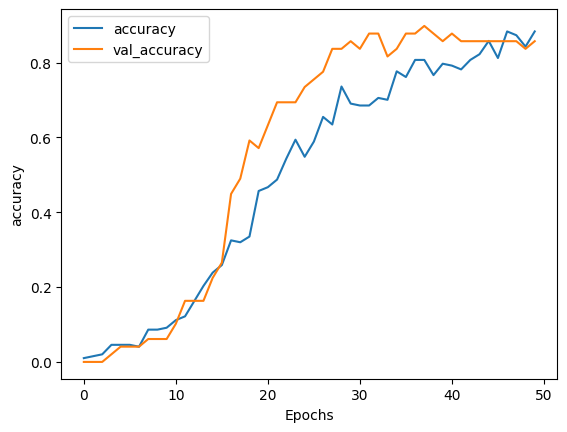

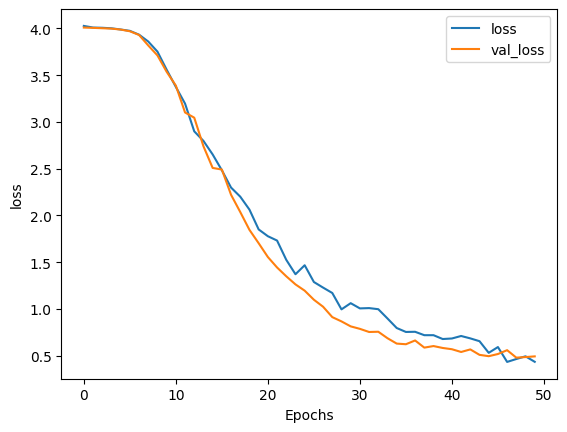

In [21]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
model.save('./model/chatbot_model.h5',history)

In [28]:
def getResponse(predictTag, responses, confidence):
    if confidence < 0.4:
        return "Maaf saya tidak mengerti."
    return np.random.choice(responses[predictTag])


def showRespon(input):
    inputA = vectorizer([input])
    prediction = model.predict(inputA)
    predictClassIndex = np.argmax(prediction, axis=-1)
    confidence = prediction[0][predictClassIndex[0]]
    predictTag = labelEncoder.get_vocabulary()[predictClassIndex[0]]
    response = getResponse(predictTag, responses, confidence)

    return predictTag, response, confidence

def chatbot():
    inputUser = input("User: ")
    testInput = inputUser
    predictTag, response, confidence = showRespon(testInput)
    print(f"User :",inputUser)
    print(f"PyChan: ", response)

while True:
    chatbot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
User : Saya merasa demam 
PyChan:  Untuk mengobati demam di rumah: 1) Minum banyak cairan agar tetap terhidrasi. 2) Kenakan pakaian yang tipis. 3) Gunakan selimut tipis jika Anda merasa kedinginan, hingga rasa dinginnya hilang. 4) Minum asetaminofen (Tylenol, dan lain-lain) atau ibuprofen (Advil, Motrin IB, dan lain-lain). 5) Cari pertolongan medis jika demam berlangsung lebih dari lima hari berturut-turut.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
User : bagaimana cara menghilangkan batuk
PyChan:  1) Madu: Gunakan madu untuk mengobati batuk, campurkan 2 sendok teh (sdt) dengan air hangat atau teh herbal. Minum campuran ini sekali atau dua kali sehari. Jangan berikan madu kepada anak di bawah usia 1 tahun. 2) Jahe: Seduh teh jahe yang menenangkan dengan menambahkan 20–40 gram (g) irisan jahe segar ke dalam secangkir air panas. Biarkan terendam selama beberapa menit sebelum diminum. Tambahkan madu atau air jeruk lemon untuk meningkatkan rasa dan meredak

KeyboardInterrupt: Interrupted by user